In [1]:
import random
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import cv2


Функция для выравнивания

In [2]:
def align_image(image, landmarks):
    src_points = landmarks[0:2] # глаза
    dst_points = np.array([[55, 65], [169, 65]], dtype=np.float32)
    
    matrix, inliers = cv2.estimateAffinePartial2D(src_points, dst_points)
    
    image = np.asarray(image)
    
    transformed_image = cv2.warpAffine(image, matrix, (224, 224))
    transformed_landmarks = cv2.transform(landmarks[np.newaxis], matrix).squeeze(axis=0)
    
    return transformed_image, transformed_landmarks


Проверим на картинках и точках из датасета

In [3]:
mark_df = pd.read_csv('./CelebA/Anno/list_landmarks_celeba.txt', header=1, sep='\\s+')
mark_df

,lefteye_x,lefteye_y,righteye_x,righteye_y,nose_x,nose_y,leftmouth_x,leftmouth_y,rightmouth_x,rightmouth_y
000001.jpg,165,184,244,176,196,249,194,271,266,260
000002.jpg,140,204,220,204,168,254,146,289,226,289
000003.jpg,244,104,264,105,263,121,235,134,251,140
000004.jpg,796,539,984,539,930,687,762,756,915,756
000005.jpg,273,169,328,161,298,172,283,208,323,207
...,...,...,...,...,...,...,...,...,...,...
202595.jpg,1449,201,1530,201,1491,259,1457,282,1522,286
202596.jpg,172,186,222,186,193,220,171,230,222,230
202597.jpg,81,121,113,120,101,142,81,155,116,155
202598.jpg,223,73,255,72,241,94,225,108,254,105


In [4]:
def show_landmarks(image, landmarks):
    """Show image with landmarks"""
    plt.imshow(image)
    plt.scatter(landmarks[:, 0], landmarks[:, 1], s=10, marker='.', c='r')


039752.jpg


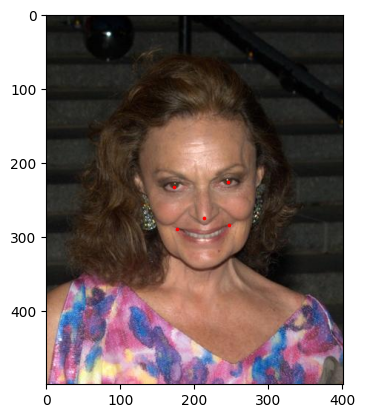

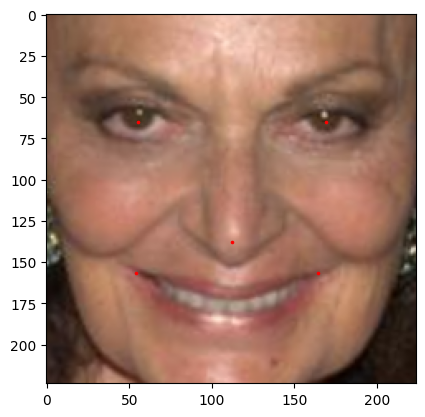

076468.jpg


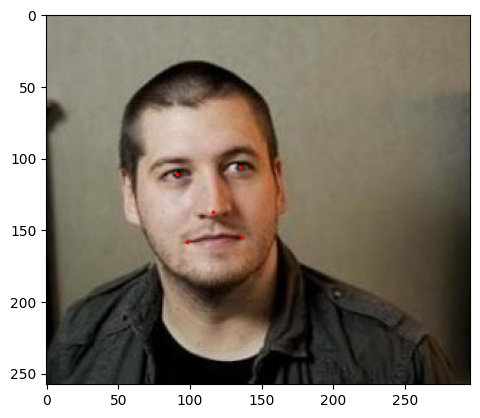

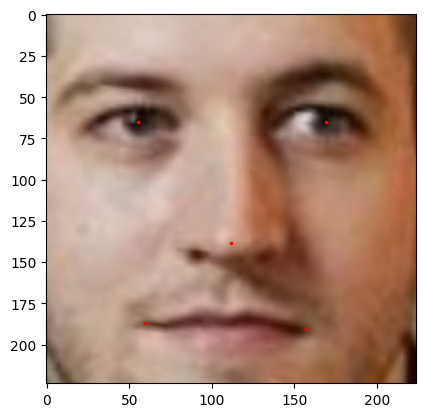

071143.jpg


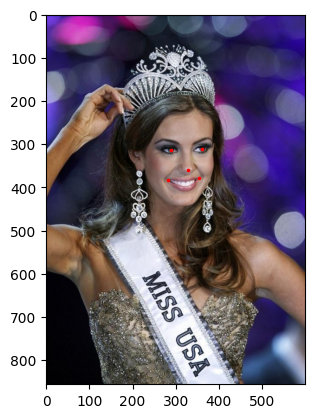

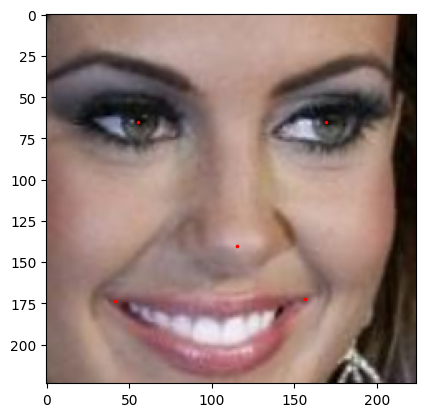

103847.jpg


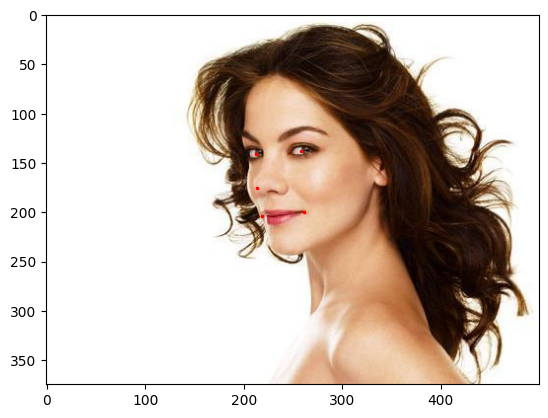

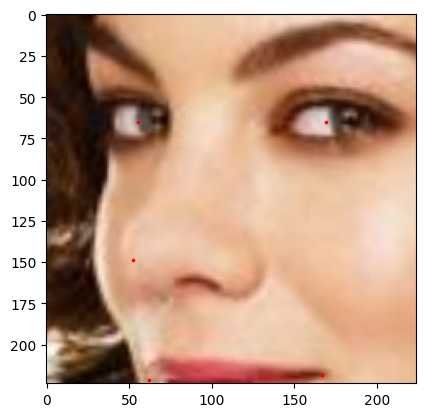

037751.jpg


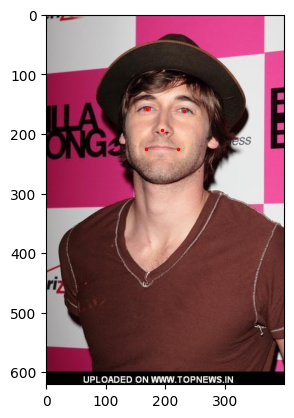

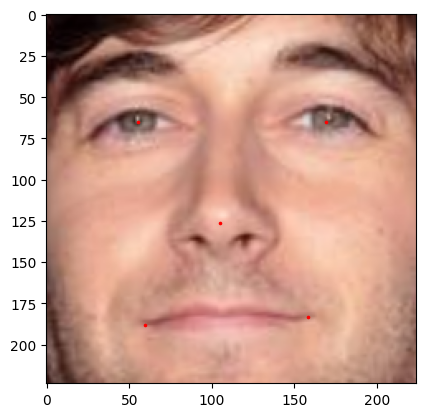

In [5]:
for n in random.sample(range(len(mark_df)), 5):
    image_name = mark_df.index[n]
    landmarks = mark_df.iloc[n]
    landmarks = np.asarray(landmarks, dtype=float).reshape(-1, 2)

    print(image_name)
    
    image = Image.open(f'CelebA/Img/img_celeba/{image_name}')
    show_landmarks(image, landmarks)
    
    plt.show()

    transformed_image, transformed_landmarks = align_image(image, landmarks)
    show_landmarks(transformed_image, transformed_landmarks)
    
    plt.show()

